In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df=pd.read_csv("mnist_test.csv")
df.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
print(df.columns)

Index(['7', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.658', '0.659', '0.660', '0.661', '0.662', '0.663', '0.664', '0.665',
       '0.666', '0.667'],
      dtype='object', length=785)


In [11]:
y = df.iloc[:, 0] 
X = df.iloc[:, 1:] 

print("Dataset Shape:", X.shape)
print("Label Distribution:", y.value_counts())

Dataset Shape: (9999, 784)
Label Distribution: 7
1    1135
2    1032
7    1027
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64


In [19]:
pca = PCA(n_components=0.90, whiten=True)
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_original = SVC(kernel='rbf', random_state=42)
svm_pca = SVC(kernel='rbf', random_state=42)

svm_original.fit(X_train, y_train)
svm_pca.fit(X_train_pca, y_train)

SVC(random_state=42)

In [21]:
y_pred_original = svm_original.predict(X_test)
y_pred_pca = svm_pca.predict(X_test_pca)

accuracy_original = accuracy_score(y_test, y_pred_original)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

conf_matrix_original = confusion_matrix(y_test, y_pred_original)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

print(f"Accuracy (Original Features): {accuracy_original * 100:.2f}%")
print(f"Accuracy (PCA Features): {accuracy_pca * 100:.2f}%")

Accuracy (Original Features): 96.45%
Accuracy (PCA Features): 96.70%


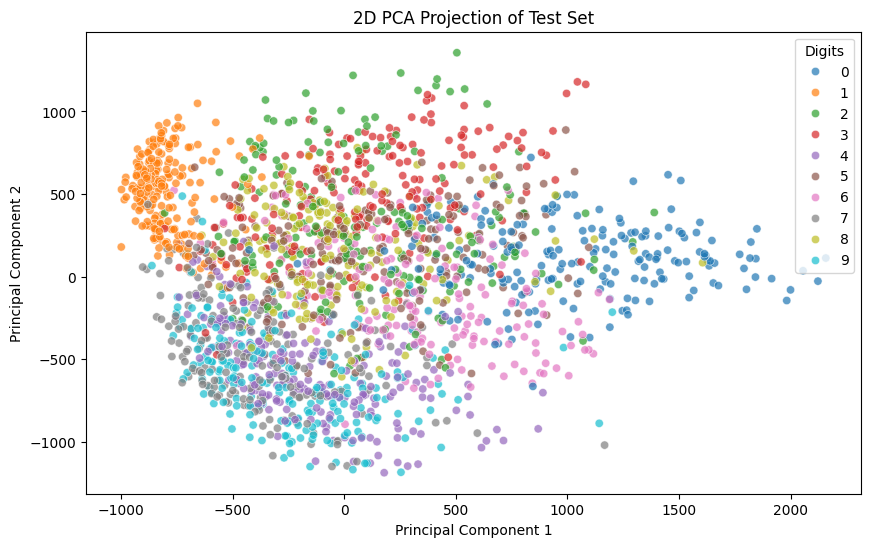


PCA reduced feature dimensions while maintaining good classification accuracy.


In [23]:
pca_2d = PCA(n_components=2)
X_test_2d = pca_2d.fit_transform(X_test)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test_2d[:, 0], y=X_test_2d[:, 1], hue=y_test, palette='tab10', alpha=0.7)
plt.title("2D PCA Projection of Test Set")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Digits")
plt.show()

print("\nPCA reduced feature dimensions while maintaining good classification accuracy.")

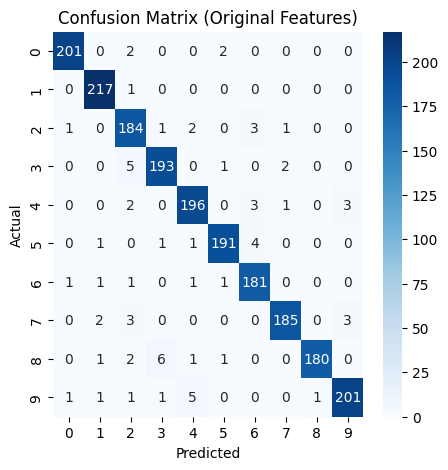

Accuracy (Original Features): 96.45%

Confusion Matrix (Original Features):
 [[201   0   2   0   0   2   0   0   0   0]
 [  0 217   1   0   0   0   0   0   0   0]
 [  1   0 184   1   2   0   3   1   0   0]
 [  0   0   5 193   0   1   0   2   0   0]
 [  0   0   2   0 196   0   3   1   0   3]
 [  0   1   0   1   1 191   4   0   0   0]
 [  1   1   1   0   1   1 181   0   0   0]
 [  0   2   3   0   0   0   0 185   0   3]
 [  0   1   2   6   1   1   0   0 180   0]
 [  1   1   1   1   5   0   0   0   1 201]]


In [39]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_original, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Original Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Accuracy (Original Features): {accuracy_original * 100:.2f}%")
print("\nConfusion Matrix (Original Features):\n", conf_matrix_original)

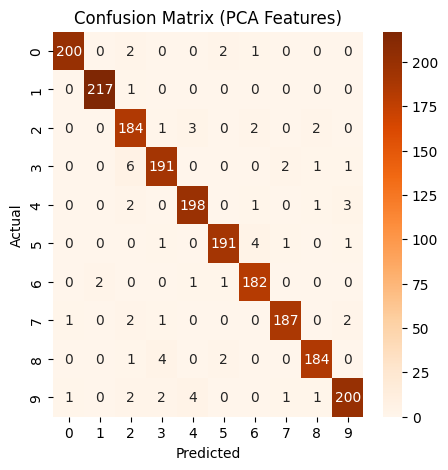

Accuracy (PCA Features): 96.70%

Confusion Matrix (PCA Features):
 [[200   0   2   0   0   2   1   0   0   0]
 [  0 217   1   0   0   0   0   0   0   0]
 [  0   0 184   1   3   0   2   0   2   0]
 [  0   0   6 191   0   0   0   2   1   1]
 [  0   0   2   0 198   0   1   0   1   3]
 [  0   0   0   1   0 191   4   1   0   1]
 [  0   2   0   0   1   1 182   0   0   0]
 [  1   0   2   1   0   0   0 187   0   2]
 [  0   0   1   4   0   2   0   0 184   0]
 [  1   0   2   2   4   0   0   1   1 200]]


In [41]:
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix (PCA Features)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"Accuracy (PCA Features): {accuracy_pca * 100:.2f}%")
print("\nConfusion Matrix (PCA Features):\n", conf_matrix_pca)